In [1]:
import numpy as np
import pandas as  pd 
import matplotlib.pyplot as plt
import import_ipynb
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.layers import Dense, Dropout
import keras

Using TensorFlow backend.


In [2]:
import Part1
from Part1 import df

importing Jupyter notebook from Part1.ipynb


In [3]:
df_copy = df.drop(["class", "outlier", "outlier2", "outComb"],axis=1)
total = df_copy.values
np.random.shuffle(total)
Y_all = total[:,8]
X_all = total[:,0:8]
Y_all = np.reshape(Y_all, (1484,1))
Y_all = Y_all -1


In [12]:
def train_model(num_layers, num_nodes):

    model = Sequential()
    #First Hidden Layer
    model.add(Dense(num_nodes, activation='relu', input_dim=8, use_bias=True)) 

    
    for i in range(num_layers - 1):
        model.add(Dense(num_nodes, activation='relu', use_bias=True))
        
    model.add(Dense(10, activation='softmax', use_bias=True))
    sgd = keras.optimizers.SGD(lr=0.01)
    model.compile(
      optimizer=sgd,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )

    return model


In [13]:
def compute_grid(layers,nodes):
    for i in layers:
        for j in nodes:
            model = train_model(i,j)
            history = model.fit(x=X_all,
                                y=to_categorical(Y_all, num_classes= 10),
                                epochs=100,validation_split=0,
                                batch_size=10,
                                verbose=0,shuffle=0,
                                validation_data=(X_all,
                                                 to_categorical(Y_all, num_classes= 10)),)
            result = model.evaluate(X_all,to_categorical(Y_all,num_classes= 10))
            error = 1-result[1]
            print("Testing error %f hidden layers and nodes %f is %f" %(i,j,error*100))
            
            

In [14]:
layers = [1,2,3]
nodes = [3,6,9,12]
compute_grid(layers,nodes)

1484/1484 [==============================] - 0s 28us/step
Testing error 1.000000 hidden layers and nodes 3.000000 is 51.010782
1484/1484 [==============================] - 0s 25us/step
Testing error 1.000000 hidden layers and nodes 6.000000 is 46.293801
1484/1484 [==============================] - 0s 26us/step
Testing error 1.000000 hidden layers and nodes 9.000000 is 43.867922
1484/1484 [==============================] - 0s 28us/step
Testing error 1.000000 hidden layers and nodes 12.000000 is 47.641510
1484/1484 [==============================] - 0s 16us/step
Testing error 2.000000 hidden layers and nodes 3.000000 is 55.256066
1484/1484 [==============================] - 0s 18us/step
Testing error 2.000000 hidden layers and nodes 6.000000 is 44.137466
1484/1484 [==============================] - 0s 17us/step
Testing error 2.000000 hidden layers and nodes 9.000000 is 45.552558
1484/1484 [==============================] - 0s 27us/step
Testing error 2.000000 hidden layers and nodes 12.00

In [15]:
model = train_model(1,6)
history = model.fit(x=X_all,
                    y=to_categorical(Y_all, num_classes= 10),
                    epochs=100,
                    validation_split=0,
                    batch_size=10,
                    verbose=0,
                    shuffle=0,
                    validation_data=(X_all,to_categorical(Y_all, num_classes= 10)),)

#PLOT train and test accuracy 
error = 1 - np.array(history.history['accuracy'])
error_train = np.reshape(error, [len(error),1])
error2 = 1 - np.array(history.history['val_accuracy'])
error_test = np.reshape(error2, [len(error2),1])


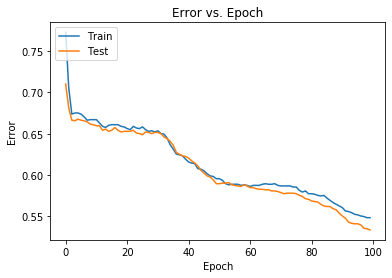

In [16]:
plt.plot(error_train)
plt.plot(error_test)
plt.title('Error vs. Epoch')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [20]:
len(history.history["val_loss"])

100